# Prediction

**Definition**: Predicting an outcome based on any kind of data, without necessarily considering time as a factor. It's about estimating an unknown value or label based on available information.

**Focus**: The primary focus is on the accuracy of the estimate, regardless of when it might occur.
Example: Predicting customer churn, classifying images, or detecting spam emails.

**Methods**: Can use a variety of techniques like machine learning algorithms (e.g., classification, regression).

# Forecasting

**Definition**: A specific type of prediction that focuses on estimating future values based on historical time-series data. It involves analyzing patterns and trends over time to project what might happen in the future.

**Focus**: Concerned with predicting future values within a specific timeframe. Time is a crucial element.
Example: Forecasting sales for the next quarter, predicting stock prices, or estimating future demand for a product.

**Methods**: Typically uses time-series analysis techniques like ARIMA, Exponential Smoothing, or Prophet.
Key Difference:

The main distinction is the temporal aspect. Forecasting is a specialized form of prediction that explicitly deals with time-dependent data and future outcomes. Prediction is a broader term that encompasses various estimation tasks, not necessarily limited by time.

In essence:

Prediction: What is likely to happen?

Forecasting: What is likely to happen in the future?

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
data = pd.read_csv('./AirPassengers.csv')

In [ ]:
data.head()

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Month        144 non-null    object
 1   #Passengers  144 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 2.4+ KB


Month column is in object so convert it into date time

In [ ]:
data['Month'] = pd.to_datetime(data['Month'])

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Month        144 non-null    datetime64[ns]
 1   #Passengers  144 non-null    int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 2.4 KB


In [ ]:
print(f"min date {data['Month'].min()} \nmax date {data['Month'].max()}")

min date 1949-01-01 00:00:00 
max date 1960-12-01 00:00:00


In [ ]:
data.shape

(144, 2)

how many years data ?

In [ ]:
print(f"{144/12} years data")

12.0 years data


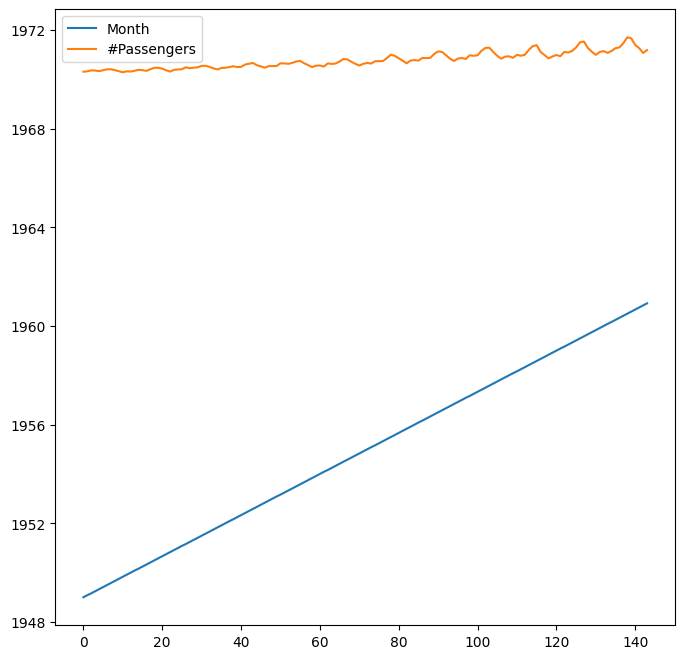

In [ ]:
data.plot(figsize=(8,8))
plt.show()

In [ ]:
data.index = data['Month']
data.drop('Month',axis=1,inplace=True)

In [ ]:
data.head()

,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


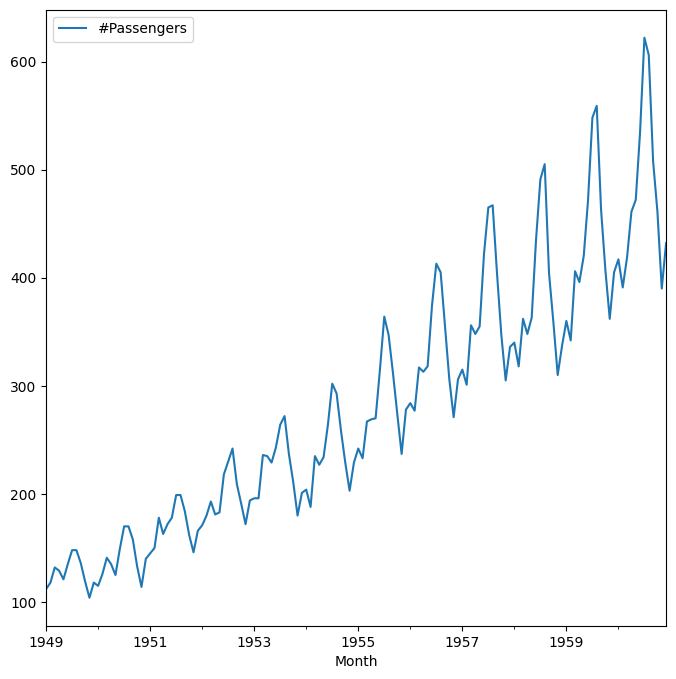

In [ ]:
data.plot(figsize=(8,8))
plt.show()

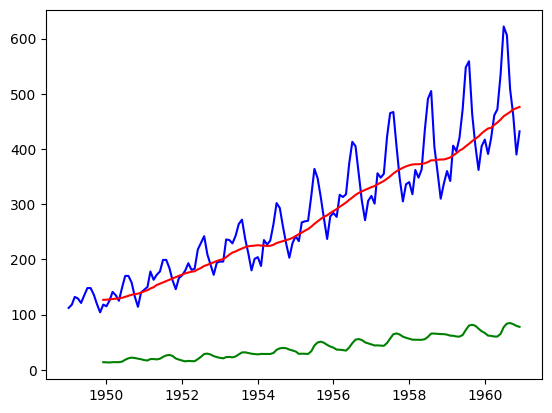

In [ ]:

passenger_mean = data['#Passengers'].rolling(window =12).mean()
passenger_std = data['#Passengers'].rolling(window =12).std()
plt.plot(data['#Passengers'],color = 'blue')
plt.plot(passenger_mean,color='red')
plt.plot(passenger_std,color='green')
plt.show()

In [ ]:
from statsmodels.tsa.stattools import adfuller

adfuller(data['#Passengers'].dropna())[1]

0.991880243437641

p-value less then alpha 0.05 so we fail to reject null hypothesis

so data is not stationary

# To remove trends and seasonality using log transformation

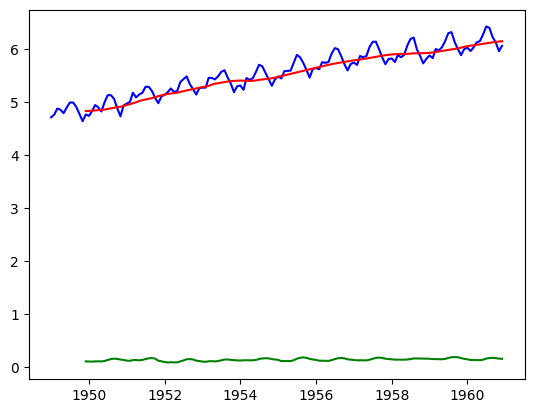

In [ ]:
log_passenger = np.log(data)
log_passenger_mean = log_passenger.rolling(window =12).mean()
log_passenger_std = log_passenger.rolling(window =12).std()
plt.plot(log_passenger,color = 'blue')
plt.plot(log_passenger_mean,color='red')
plt.plot(log_passenger_std,color='green')
plt.show()

In [ ]:
adfuller(log_passenger.dropna())[1]

0.4223667747703874

seasonality still present as adfuller test result is not less the 0.05

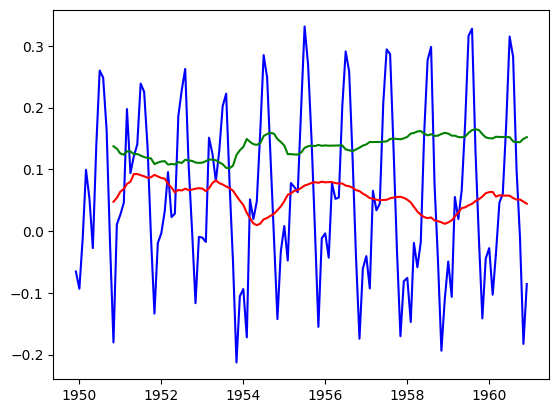

In [ ]:
log_passenger2 = log_passenger-log_passenger_mean
log_passenger2.dropna(inplace=True)
log_passenger_mean2 = log_passenger2.rolling(window =12).mean()
log_passenger_std2 = log_passenger2.rolling(window =12).std()
plt.plot(log_passenger2,color = 'blue')
plt.plot(log_passenger_mean2,color='red')
plt.plot(log_passenger_std2,color='green')
plt.show()

In [ ]:
adfuller(log_passenger2)[1]

0.022234630001242206

now our data is stationary

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

max_lags = 20

# Plot ACF
plt.figure(figsize=(12, 6))
plot_acf(log_passenger2.dropna(), lags=max_lags)
plt.title("Autocorrelation Function (ACF)")
plt.xlabel("Lag")
plt.ylabel("ACF")
plt.show()

# Plot PACF
plt.figure(figsize=(12, 6))
plot_pacf(log_passenger2.dropna(), lags=max_lags)
plt.title("Partial Autocorrelation Function (PACF)")
plt.xlabel("Lag")
plt.ylabel("PACF")
plt.show()

In [ ]:
data.dropna(inplace = True)

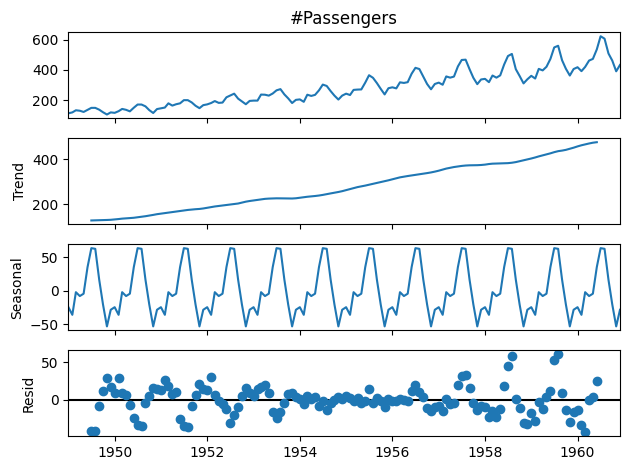

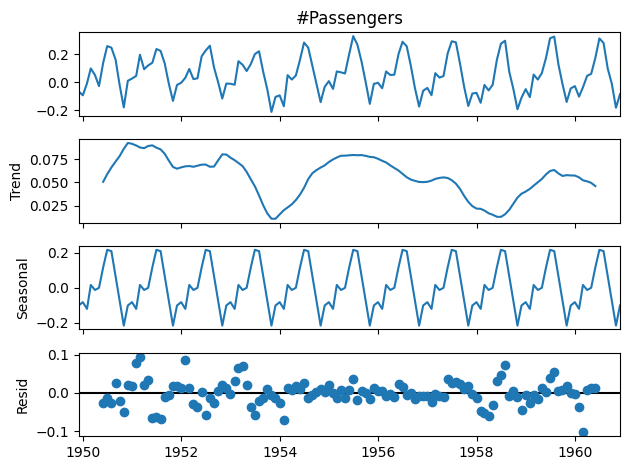

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Perform seasonal decomposition
old_decomposition = seasonal_decompose(data['#Passengers'])
old_decomposition.plot()
plt.show()
decomposition = seasonal_decompose(log_passenger2['#Passengers'])
decomposition.plot()
plt.show()



In [ ]:
!pip install pmdarima

In [ ]:
from pmdarima.arima import auto_arima

arima_model = auto_arima(log_passenger2['#Passengers'],seasonal=False,trace=True)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=-252.032, Time=0.20 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=-133.698, Time=0.04 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=-232.914, Time=0.10 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,0,1)(0,0,0)[0]             : AIC=-235.789, Time=0.12 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=-248.543, Time=0.16 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,0,1)(0,0,0)[0]             : AIC=-253.366, Time=0.57 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=-250.471, Time=0.08 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=-253.365, Time=0.07 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(3,0,1)(0,0,0)[0]             : AIC=-256.118, Time=0.55 sec
 ARIMA(3,0,0)(0,0,0)[0]             : AIC=-252.235, Time=0.14 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(4,0,1)(0,0,0)[0]             : AIC=-260.773, Time=0.27 sec
 ARIMA(4,0,0)(0,0,0)[0]             : AIC=-253.729, Time=0.11 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(5,0,1)(0,0,0)[0]             : AIC=-258.818, Time=1.92 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(4,0,2)(0,0,0)[0]             : AIC=-258.835, Time=4.56 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(3,0,2)(0,0,0)[0]             : AIC=-259.054, Time=3.46 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(5,0,0)(0,0,0)[0]             : AIC=-253.633, Time=0.55 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(5,0,2)(0,0,0)[0]             : AIC=-256.774, Time=1.73 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(4,0,1)(0,0,0)[0] intercept   : AIC=-272.961, Time=2.35 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=-277.308, Time=1.95 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=-279.238, Time=1.36 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=-254.090, Time=1.75 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=-260.142, Time=2.11 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=-277.439, Time=3.08 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=-233.989, Time=0.07 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=-252.154, Time=1.13 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=-261.472, Time=1.17 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(3,0,2)(0,0,0)[0] intercept   : AIC=-285.263, Time=2.33 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(4,0,2)(0,0,0)[0] intercept   : AIC=-283.078, Time=1.47 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(3,0,3)(0,0,0)[0] intercept   : AIC=-267.800, Time=7.67 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,0,3)(0,0,0)[0] intercept   : AIC=inf, Time=1.48 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(4,0,3)(0,0,0)[0] intercept   : AIC=-283.287, Time=5.63 sec

Best model:  ARIMA(3,0,2)(0,0,0)[0] intercept
Total fit time: 48.258 seconds


In [ ]:
train = log_passenger2.iloc[:120]['#Passengers']
test = log_passenger2.iloc[120:]['#Passengers']

In [ ]:
from statsmodels.tsa.arima.model import ARIMA

model = ARIMA(train,order=(3, 0, 2))
model_fit = model.fit()

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Us

In [ ]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:            #Passengers   No. Observations:                  120
Model:                 ARIMA(3, 0, 2)   Log Likelihood                 134.726
Date:                Tue, 18 Feb 2025   AIC                           -255.453
Time:                        16:03:00   BIC                           -235.940
Sample:                    12-01-1949   HQIC                          -247.529
                         - 11-01-1959                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0563      0.006      8.958      0.000       0.044       0.069
ar.L1          0.7851      0.151      5.199      0.000       0.489       1.081
ar.L2          0.2854      0.186      1.531      0.126      -0.080       0.651
ar.L3         -0.5319      0.120     -4.440      0.000      -0.767      -0.297
ma.L1          0.1278      0.122      1.043      0.297      -0.112       0.368
ma.L2         -0.7497      0.093     -8.051      0.000      -0.932      -0.567
sigma2         0.0061      0.001      5.414      0.000       0.004       0.008
===================================================================================
Ljung-Box (L1) (Q):                   0.39   Jarque-Bera (JB):                 3.85
Prob(Q):                              0.53   Prob(JB):                         0.15
Heteroskedasticity (H):               0.98   Skew:                             0.11
Prob(H) (two-sided):                  0.95   Kurtosis:                         2.15
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
log_passenger2['prediction'] = model_fit.predict(start=len(train),end=len(train)+len(test)-1, dynamic=True)

In [ ]:
log_passenger2.head()

,#Passengers,prediction
Month,,
1949-12-01,-0.065494,NaN
1950-01-01,-0.093449,NaN
1950-02-01,-0.007566,NaN
1950-03-01,0.099416,NaN
1950-04-01,0.052142,NaN


<Axes: xlabel='Month'>

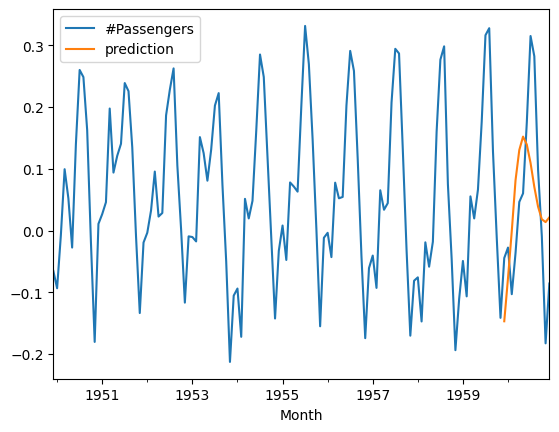

In [ ]:
log_passenger2[['#Passengers', 'prediction']].plot()

forecasting is not accurate

In [ ]:
from statsmodels.tsa.statespace.sarimax import SARIMAX, SARIMAXResults

model = SARIMAX(train, order=(3, 0, 2), seasonal_order=(3, 0, 2, 12))
model_fit = model.fit()

In [ ]:
log_passenger2['prediction'] = model_fit.predict(start=len(train),end=len(train)+len(test)-1, dynamic=True)

<Axes: xlabel='Month'>

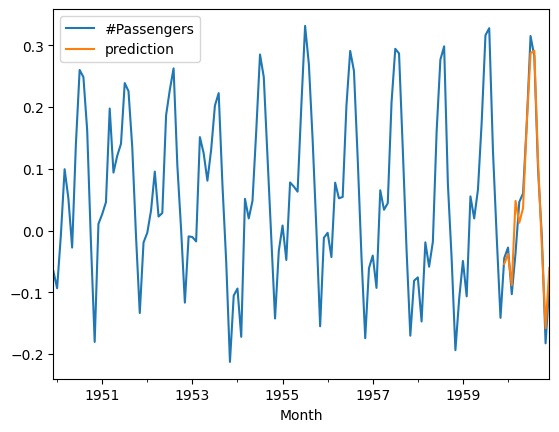

In [ ]:
log_passenger2[['#Passengers', 'prediction']].plot()

# Generate forecasts for the next 60 months i.e 5 years

In [ ]:

forecast_steps = 60  # Number of months to forecast

In [ ]:
forecast_for_next_5years = model_fit.forecast(steps=forecast_steps)

<Axes: xlabel='Month'>

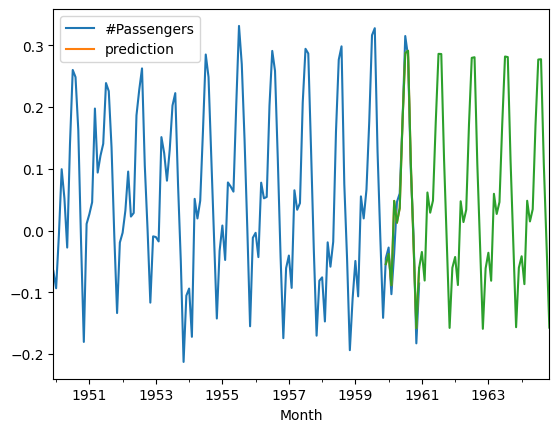

In [ ]:
log_passenger2.plot()
forecast_for_next_5years.plot()

In [ ]:
forecast = model_fit.get_forecast(steps=forecast_steps)

In [ ]:
# Get the predicted values and confidence intervals
predicted_values = forecast.predicted_mean
confidence_intervals = forecast.conf_int()

In [ ]:
predicted_values.head()

,predicted_mean
1959-12-01,-0.054236
1960-01-01,-0.037835
1960-02-01,-0.088548
1960-03-01,0.048063
1960-04-01,0.012650


In [ ]:
confidence_intervals.head()

,lower #Passengers,upper #Passengers
1959-12-01,-0.120625,0.012153
1960-01-01,-0.117139,0.041469
1960-02-01,-0.171734,-0.005361
1960-03-01,-0.036918,0.133044
1960-04-01,-0.072811,0.098111


In [ ]:
# Create a date range for the forecast period
# Assuming your data has a DateTimeIndex
forecast_dates = pd.date_range(start=train.index[-1], periods=forecast_steps + 1, freq='MS')[1:]


In [ ]:
# Create a DataFrame for the forecast results
forecast_df = pd.DataFrame({'Forecast': predicted_values,
                           'Lower CI': confidence_intervals.iloc[:, 0],
                           'Upper CI': confidence_intervals.iloc[:, 1]},
                          index=forecast_dates)

In [ ]:
forecast_df.head(100)

,Forecast,Lower CI,Upper CI
1959-12-01,-0.054236,-0.120625,0.012153
1960-01-01,-0.037835,-0.117139,0.041469
1960-02-01,-0.088548,-0.171734,-0.005361
1960-03-01,0.048063,-0.036918,0.133044
1960-04-01,0.012650,-0.072811,0.098111
1960-05-01,0.036305,-0.049456,0.122065
1960-06-01,0.174816,0.089009,0.260624
1960-07-01,0.287433,0.201568,0.373299
1960-08-01,0.291268,0.205401,0.377135
1960-09-01,0.110756,0.024875,0.196638


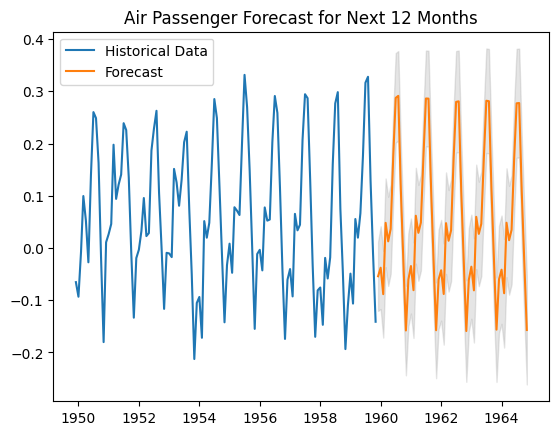

In [ ]:
# Plot the forecast along with historical data
plt.plot(train, label='Historical Data')
plt.plot(forecast_df['Forecast'], label='Forecast')
plt.fill_between(forecast_dates, forecast_df['Lower CI'], forecast_df['Upper CI'], alpha=0.2, color='gray')
plt.legend()
plt.title('Air Passenger Forecast for Next 12 Months')
plt.show()